In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import matplotlib.cm as cm
from sklearn.cluster import KMeans
%matplotlib inline

In [5]:
df = pd.read_excel('/content/datat.xlsx')
df = df.dropna()
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
1,1.0,Male,19.0,15.0,39.0
3,2.0,Male,21.0,15.0,81.0
5,3.0,Female,20.0,16.0,6.0
7,4.0,Female,23.0,16.0,77.0
9,5.0,Female,31.0,17.0,40.0


In [7]:
import seaborn as sns 

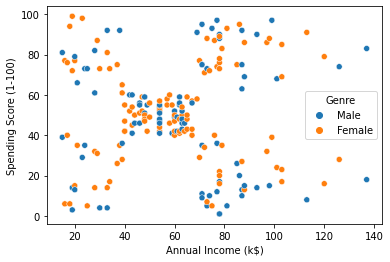

In [8]:
sns.scatterplot(x='Annual Income (k$)' , y = 'Spending Score (1-100)',data=df , hue='Genre')

In [17]:
True in np.array(df.isna())

False

([<matplotlib.axis.XTick at 0x7f6b8a42e910>,
 <a list of 10 Text major ticklabel objects>)

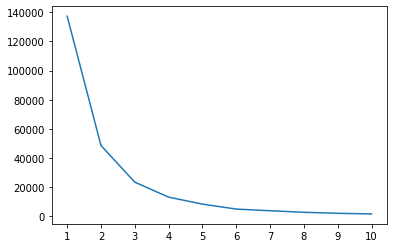

In [113]:
wcss = []
x= np.array(df['Annual Income (k$)'])
for i in range(1,11):
  k_means = KMeans(n_clusters=i,random_state=42)
  k_means.fit(x.reshape(-1, 1))
  wcss.append(k_means.inertia_)
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))

In [122]:
k_means = KMeans(n_clusters=5,random_state=42)
k_means.fit(df[['CustomerID', 	'Age' ,	'Annual Income (k$)' ,	'Spending Score (1-100)']])

y_kmeans = k_means.predict(df[['CustomerID', 	'Age' ,	'Annual Income (k$)' ,	'Spending Score (1-100)']])

In [123]:
wcss

[]

[[162.          32.69230769  86.53846154  82.12820513]
 [ 23.04166667  25.25        25.83333333  76.91666667]
 [ 93.04615385  42.96923077  57.93846154  49.44615385]
 [164.          40.80555556  87.91666667  17.88888889]
 [ 35.47222222  45.19444444  32.94444444  31.47222222]]


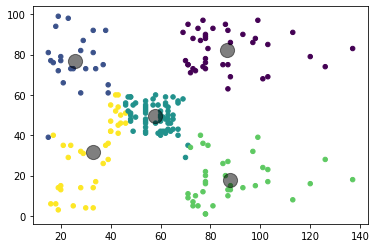

In [124]:
x= df['Annual Income (k$)']
k_means = KMeans(n_clusters=5,random_state=42)
x1 = df['Spending Score (1-100)']
k_means.fit(df[['CustomerID', 	'Age' ,	'Annual Income (k$)' ,	'Spending Score (1-100)']])
plt.scatter(x, x1, c= y_kmeans, s=20, cmap='viridis')
centers = k_means.cluster_centers_
print(centers)
plt.scatter(centers[:, 2], centers[:, 3], c='black', s=200, alpha=0.5);

[[162.          32.69230769  86.53846154  82.12820513]
 [ 23.04166667  25.25        25.83333333  76.91666667]
 [ 93.04615385  42.96923077  57.93846154  49.44615385]
 [164.          40.80555556  87.91666667  17.88888889]
 [ 35.47222222  45.19444444  32.94444444  31.47222222]]


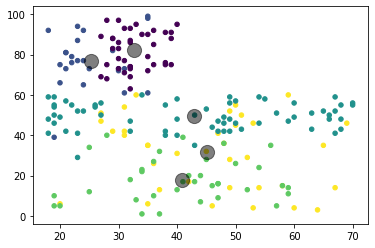

In [125]:
x= df['Age']
k_means = KMeans(n_clusters=5,random_state=42)
x1 = df['Spending Score (1-100)']
k_means.fit(df[['CustomerID', 	'Age' ,	'Annual Income (k$)' ,	'Spending Score (1-100)']])
plt.scatter(x, x1, c= y_kmeans, s=20, cmap='viridis')
centers = k_means.cluster_centers_
print(centers)
plt.scatter(centers[:, 1], centers[:, 3], c='black', s=200, alpha=0.5);

In [126]:
calinski_harabasz_score(df[['CustomerID', 	'Age' ,	'Annual Income (k$)',	'Spending Score (1-100)' ]], y_kmeans)
#,	'Spending Score (1-100)'

253.9303408738743

In [127]:
silhouette_score(df[['CustomerID', 	'Age' ,	'Annual Income (k$)',	'Spending Score (1-100)']], k_means.labels_)

0.4231991174101769

In [139]:
wcss = []
x = df[['CustomerID', 	'Age' ,	'Annual Income (k$)' ,	'Spending Score (1-100)']]
# x= np.array(df[['CustomerID', 	'Age' ,	'Annual Income (k$)' ,	'Spending Score (1-100)']])
for i in range(2,11):
  k_means = KMeans(n_clusters=i,random_state=42)
  k_means.fit(x)
  y_kmeans = k_means.predict(x)

  print(f'calinski_harabasz_score {calinski_harabasz_score(x, y_kmeans)}')
  print(f'silhouette_score {silhouette_score(x, k_means.labels_)}')
  print('-------------------------------------------------------------------')



calinski_harabasz_score 301.0524615438382
silhouette_score 0.47934627465976204
-------------------------------------------------------------------
calinski_harabasz_score 255.59610311094298
silhouette_score 0.37674423270868146
-------------------------------------------------------------------
calinski_harabasz_score 260.8986910098865
silhouette_score 0.42253938419029213
-------------------------------------------------------------------
calinski_harabasz_score 253.9303408738743
silhouette_score 0.4231991174101769
-------------------------------------------------------------------
calinski_harabasz_score 269.9694956593469
silhouette_score 0.4096552215921523
-------------------------------------------------------------------
calinski_harabasz_score 264.8482541592994
silhouette_score 0.3969211766087617
-------------------------------------------------------------------
calinski_harabasz_score 283.3293043673785
silhouette_score 0.4058821202879106
------------------------------------------

In [138]:
k_means = KMeans(n_clusters= 1,random_state=42)
k_means.fit(x)
k_means.predict(x)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)